<h2  style="color:Blue;text-align: center" class="list-group-item list-group-item-action active">1. Importing Necessary Libraries </h2><a id = "1"></a>

In [35]:
import re 
import string
# Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option("display.max_rows", None,"display.max_columns", None)
warnings.simplefilter(action='ignore')
plt.style.use('seaborn')

# Algorithmes
import gensim
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from autocorrect import Speller
from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LSTM, Dropout, Activation, Embedding, Bidirectional,SimpleRNN
from keras.callbacks import ReduceLROnPlateau


<h2  style="color:Blue;text-align: center" class="list-group-item list-group-item-action active">2. Data Collection </h2><a id = "2"></a>

In [36]:
df = pd.read_csv("all_clean_CovidData.csv")
df.head()

,Text,Label
0,health author monitor new covid outbreak saska...,1
1,coronaviru spread ecuadorian citi quit guayaquil,0
2,need know covid bc april,1
3,one media person report world destruct face de...,1
4,statement come time fastspread covid viru disr...,1


In [37]:
df.shape

(33930, 2)

<h2  style="color:Blue;text-align: center" class="list-group-item list-group-item-action active">5.  Feature Engineering </h2><a id = "5"></a>

In [38]:
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

exam="covid19 is fatal disease :https://www.kaggle.com/c/nlp-getting-started"
print(remove_URL(exam))

covid19 is fatal disease :


In [39]:
df["Text"]=df["Text"].apply(remove_URL)

In [40]:
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

exam="""<div>
<h1>'Michigan governor violated social distancing order while signing stay-at-home order.\t\t'</h1>
<a href="https://www.kaggle.com/c/nlp-getting-started">enter</a>
</div>"""
print(remove_html(exam))


'Michigan governor violated social distancing order while signing stay-at-home order.		'
enter



In [41]:
df["Text"]=df["Text"].apply(remove_html)

In [42]:
exclude = string.punctuation

def remove_punc(text):
    return text.translate(str.maketrans('', '', exclude))

df["Text"]=df["Text"].apply(remove_punc)

In [43]:
tl=PorterStemmer()
stopwords=stopwords.words('english')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [44]:
CustomStopWords=['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'only',
 'own',
 'same',
 'so',
 'than',
 'too',
 'very',
 's',
 't',
 'can',
 'will',
 'just',
 'don',
 'should',
 "should've",
 'now',
 'd',
 'll',
 'm',
 'o',
 're',
 've',
 'y']

In [45]:
spell = Speller(lang='en')

def clean_line(line):
    line =re.sub(r'[^a-zA-Z]',' ',line) 
    line=line.lower()
    line=spell(line)
    line=gensim.utils.simple_preprocess(line, deacc=True)#return list #ignore tokens that are too short or too long
    #line=line.split()
    line=[tl.stem(word) for word in line if word not in CustomStopWords]
    line=" ".join(line)
    return line

In [46]:
x=df["Text"]
y=df['Label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=24, shuffle =True)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((23751,), (10179,), (23751,), (10179,))

<h2  style="color:Blue;text-align: center" class="list-group-item list-group-item-action active">6. Modelling </h2><a id = "6"></a>

In [47]:
len_tweet=[len(i) for i in df['Text']]

<AxesSubplot:ylabel='Count'>

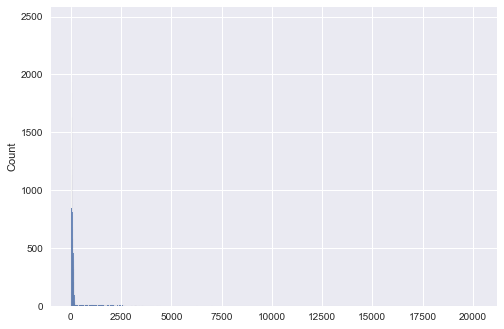

In [48]:
sns.histplot(x=len_tweet,data=df)

<AxesSubplot:>

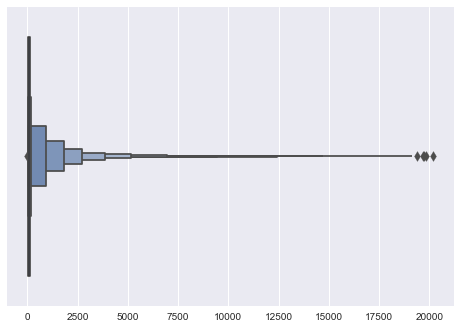

In [49]:
sns.boxenplot(x=len_tweet,data=df)

In [50]:
max_features = 20000
maxlen = 500
batch_size = 256
epochs = 10
embed_size = 100

In [51]:
tokenizer = Tokenizer(num_words=max_features,oov_token='<OOV>')
tokenizer.fit_on_texts(x_train)
tokenizer.word_index

{'<OOV>': 1,
 'covid': 2,
 'coronaviru': 3,
 'viru': 4,
 'case': 5,
 'china': 6,
 'peopl': 7,
 'health': 8,
 'not': 9,
 'new': 10,
 'said': 11,
 'infect': 12,
 'test': 13,
 'report': 14,
 'say': 15,
 'state': 16,
 'spread': 17,
 'outbreak': 18,
 'corona': 19,
 'wuhan': 20,
 'also': 21,
 'patient': 22,
 'chines': 23,
 'countri': 24,
 'hospit': 25,
 'death': 26,
 'one': 27,
 'day': 28,
 'diseas': 29,
 'us': 30,
 'no': 31,
 'time': 32,
 'govern': 33,
 'confirm': 34,
 'nov': 35,
 'number': 36,
 'use': 37,
 'world': 38,
 'travel': 39,
 'like': 40,
 'vaccin': 41,
 'first': 42,
 'includ': 43,
 'india': 44,
 'public': 45,
 'pandem': 46,
 'citi': 47,
 'show': 48,
 'medic': 49,
 'novel': 50,
 'may': 51,
 'prevent': 52,
 'claim': 53,
 'take': 54,
 'two': 55,
 'year': 56,
 'get': 57,
 'mask': 58,
 'nation': 59,
 'symptom': 60,
 'person': 61,
 'work': 62,
 'would': 63,
 'week': 64,
 'emerg': 65,
 'human': 66,
 'home': 67,
 'caus': 68,
 'could': 69,
 'close': 70,
 'respiratori': 71,
 'need': 72,
 'p

In [52]:
len(tokenizer.word_index)

23920

In [53]:
# now I want to transform each row that has words to number(match with dictionary in tokenier)
train_sequences = tokenizer.texts_to_sequences(x_train)
#example: it take some word in first row 
tokenizer.texts_to_sequences(["michigan governor violat social distanc order sign stayathom order"]) 

[[1555, 763, 1126, 170, 411, 181, 434, 1924, 181]]

In [54]:
x_train = pad_sequences(train_sequences, maxlen=maxlen)

In [55]:
tokenized_test = tokenizer.texts_to_sequences(x_test)
X_test = pad_sequences(tokenized_test, maxlen=maxlen)

In [56]:
#Defining Neural Network
model = Sequential()
#Non-trainable embeddidng layer
model.add(Embedding(max_features,output_dim=embed_size, input_length=maxlen))
#LSTM 
model.add(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25))
model.add(LSTM(units=64 , recurrent_dropout = 0.1 , dropout = 0.1))
model.add(Dense(units = 32 , activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [57]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 100)          2000000   
                                                                 
 lstm_4 (LSTM)               (None, 500, 128)          117248    
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,168,769
Trainable params: 2,168,769
Non-trainable params: 0
_________________________________________________________________


In [58]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [59]:
history = model.fit(x_train, y_train, batch_size = batch_size , validation_data = (X_test,y_test) , epochs = epochs , callbacks = [learning_rate_reduction])

Epoch 1/10
93/93 [==============================] - 1744s 19s/step - loss: 0.4119 - accuracy: 0.8062 - val_loss: 0.3213 - val_accuracy: 0.8701 - lr: 0.0100
Epoch 2/10
93/93 [==============================] - 2545s 27s/step - loss: 0.2292 - accuracy: 0.9076 - val_loss: 0.2841 - val_accuracy: 0.8881 - lr: 0.0100
Epoch 3/10
93/93 [==============================] - 2890s 31s/step - loss: 0.1456 - accuracy: 0.9447 - val_loss: 0.2941 - val_accuracy: 0.8864 - lr: 0.0100
Epoch 4/10
93/93 [==============================] - ETA: 0s - loss: 0.0977 - accuracy: 0.9660 
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.004999999888241291.
93/93 [==============================] - 3125s 34s/step - loss: 0.0977 - accuracy: 0.9660 - val_loss: 0.3508 - val_accuracy: 0.8851 - lr: 0.0100
Epoch 5/10
93/93 [==============================] - 3284s 35s/step - loss: 0.0523 - accuracy: 0.9828 - val_loss: 0.3716 - val_accuracy: 0.8906 - lr: 0.0050
Epoch 6/10
93/93 [==============================] - 3462s 37s

In [60]:
print("Accuracy of the model on Training Data is - " , model.evaluate(x_train,y_train)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

743/743 [==============================] - 370s 498ms/step - loss: 0.0075 - accuracy: 0.9980
Accuracy of the model on Training Data is -  99.8021125793457 %
319/319 [==============================] - 151s 473ms/step - loss: 0.6174 - accuracy: 0.8865
Accuracy of the model on Testing Data is -  88.6531114578247 %


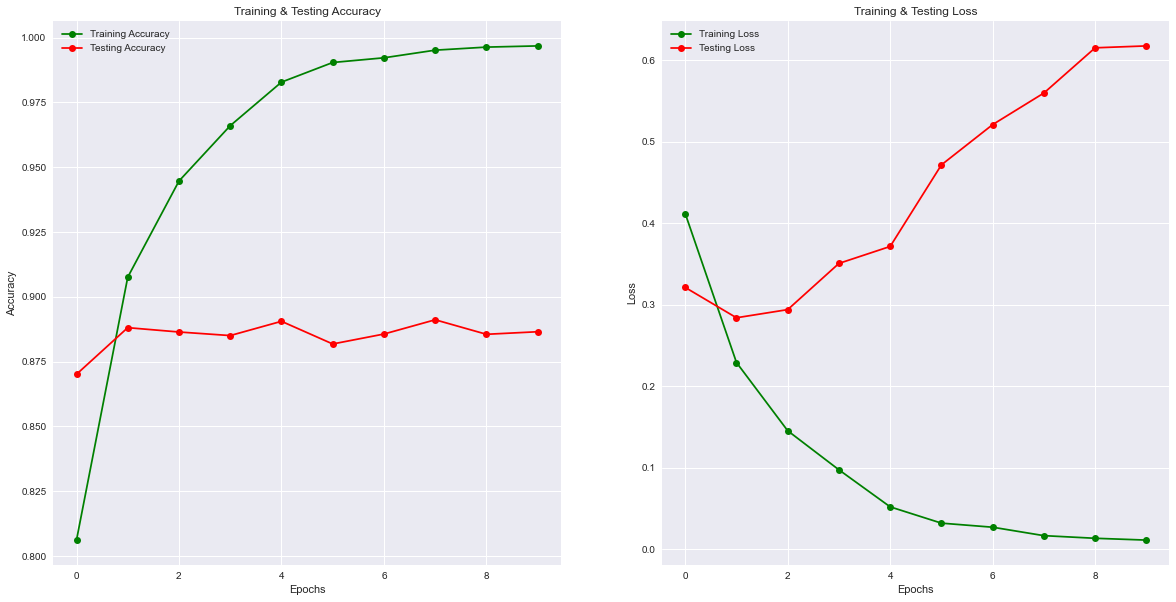

In [61]:
epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [62]:
pred = model.predict_classes(X_test)
pred[:5]

AttributeError: 'Sequential' object has no attribute 'predict_classes'

# Test

In [63]:
test=pd.read_csv("collected_test.txt",sep='\t')
test.sample(5)

,Text,Label
16,Children can get COVID-19,1
20,"No medicines cure COVID-19, but some might hel...",1
9,Obesity kills more people than Coronavirus.,0
24,You can die from COVID-19.,1
3,Face masks don’t work.,0


In [64]:
test.Label.value_counts()

1    16
0    15
Name: Label, dtype: int64

In [65]:
test["Text"]=test["Text"].apply(remove_URL)
test["Text"]=test["Text"].apply(remove_html)
test["Text"]=test["Text"].apply(remove_punc)
test["Text"]=test["Text"].apply(clean_line)
txt = tokenizer.texts_to_sequences(test['Text'])
txt_padded = pad_sequences(txt, maxlen=maxlen)

#### now test data is cleaned 
#### there are tow ways for prediction
## first

In [75]:
#predictTest = model.predict_classes(txt_padded)
#predictTest

In [76]:
#test["test_first"]=predictTest

In [77]:
#test

#### first method not work

## second

In [71]:
pred = model.predict(txt_padded)
predic=[1 if i>=0.5 else 0 for i in pred]
predic[:5]

1/1 [==============================] - 1s 564ms/step


[0, 1, 1, 0, 0]

In [72]:
test["test_second_precentage"]=pred
test["test_second"]=predic

In [73]:
test

,Text,Label,test_second_precentage,test_second
0,covid not kill diseas,0,0.003870,0
1,covid affect older peopl young peopl worri,0,0.989183,1
2,youv covid aren show symptom won transmit diseas,0,0.999369,1
3,face mask work,0,0.006481,0
4,mask harm health kill,0,0.000161,0
5,need worri second wave covid normal winter col...,0,0.999501,1
6,covid death rate peopl catch,0,0.925388,1
7,test inaccur test covid fals posit,0,0.000832,0
8,let everyon catch viru becom immun even caus d...,0,0.695785,1
9,obes kill peopl coronaviru,0,0.000227,0


In [74]:
sum(test["test_second"]==test["Label"])/len(test)

0.45161290322580644